In [9]:
import hail as hl
import matplotlib.pyplot as plt

In [3]:
### full object for all samples
mt = hl.read_matrix_table('gs://cpg-tob-wgs-test/tob_wgs_vep/v1/vep105_GRCh38.mt')
mt.count()

Initializing Hail with default parameters...


2022-08-18 05:25:09 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2022-08-18 05:25:10 WARN  Hail:43 - This Hail JAR was compiled for Spark 3.1.3, running with Spark 3.1.2.
  Compatibility is not guaranteed.
2022-08-18 05:25:11 WARN  Utils:69 - Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


Running on Apache Spark version 3.1.2
SparkUI available at http://annas-notebook.australia-southeast1-a.c.notebooks-314505.internal:4041
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.97-937922d7f46c
LOGGING: writing to /home/jupyter/hail-20220818-0525-0.2.97-937922d7f46c.log


(77899783, 1061)

In [4]:
### select larger object based on variants

In [5]:
mt = hl.filter_intervals(mt, [hl.parse_locus_interval('chr22:23219960-23348287', reference_genome='GRCh38')])
mt.count()

(3519, 1061)

In [6]:
mt = hl.variant_qc(mt)

In [7]:
mt.variant_qc.show()

+----------------+------------+--------------------------+
| locus          | alleles    | variant_qc.dp_stats.mean |
+----------------+------------+--------------------------+
| locus<GRCh38>  | array<str> |                  float64 |
+----------------+------------+--------------------------+
| chr22:23220004 | ["A","G"]  |                 3.90e+01 |
| chr22:23220166 | ["G","T"]  |                 3.30e+01 |
| chr22:23220186 | ["T","C"]  |                 4.00e+01 |
| chr22:23220195 | ["A","T"]  |                 6.70e+01 |
| chr22:23220257 | ["T","C"]  |                 4.18e+01 |
| chr22:23220273 | ["T","C"]  |                 4.80e+01 |
| chr22:23220328 | ["G","T"]  |                 4.37e+01 |
| chr22:23220341 | ["T","C"]  |                 4.25e+01 |
| chr22:23220526 | ["T","C"]  |                 4.33e+01 |
| chr22:23220574 | ["C","T"]  |                 4.76e+01 |
+----------------+------------+--------------------------+

+---------------------------+-------------------------+
| variant_qc.dp_stats.stdev | variant_qc.dp_stats.min |
+---------------------------+-------------------------+
|                   float64 |                 float64 |
+---------------------------+-------------------------+
|                  5.94e+00 |                2.80e+01 |
|                  0.00e+00 |                3.30e+01 |
|                  0.00e+00 |                4.00e+01 |
|                  0.00e+00 |                6.70e+01 |
|                  6.76e+00 |                3.20e+01 |
|                  0.00e+00 |                4.80e+01 |
|                  8.19e+00 |                3.00e+01 |
|                  6.26e+00 |                3.60e+01 |
|                  3.42e+00 |                4.00e+01 |
|                  1.05e+01 |                2.80e+01 |
+---------------------------+-------------------------+

+-------------------------+--------------------------+
| variant_qc.dp_stats.max | variant_qc.gq_stats.mean |
+-------------------------+--------------------------+
|                 float64 |                  float64 |
+-------------------------+--------------------------+
|                4.60e+01 |                 9.90e+01 |
|                3.30e+01 |                 9.90e+01 |
|                4.00e+01 |                 9.90e+01 |
|                6.70e+01 |                 9.90e+01 |
|                5.10e+01 |                 9.90e+01 |
|                4.80e+01 |                 9.90e+01 |
|                6.20e+01 |                 9.90e+01 |
|                5.10e+01 |                 9.90e+01 |
|                4.80e+01 |                 9.90e+01 |
|                7.00e+01 |                 9.90e+01 |
+-------------------------+--------------------------+

+---------------------------+-------------------------+
| variant_qc.gq_stats.stdev | variant_qc.gq_stats.min |
+---------------------------+-------------------------+
|                   float64 |                 float64 |
+---------------------------+-------------------------+
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
+---------------------------+-------------------------+

+-------------------------+---------------+---------------------+
| variant_qc.gq_stats.max | variant_qc.AC | variant_qc.AF       |
+-------------------------+---------------+---------------------+
|                 float64 | array<int32>  | array<float64>      |
+-------------------------+---------------+---------------------+
|                9.90e+01 | [6,6]         | [5.00e

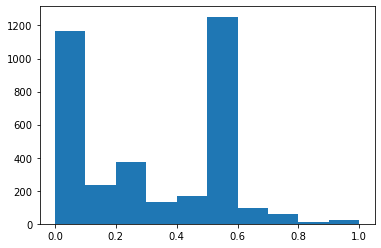

In [12]:
plt.hist(mt.variant_qc.AF[1].collect())
plt.show()

In [13]:
mt.count()

(3519, 1061)

In [5]:
### smaller object for just one sample
donor_mt = mt.filter_cols(mt.s == 'CPG9951')
donor_mt.count()

(3519, 1)

In [6]:
donor_mt.filter_rows(hl.len(donor_mt.rsid) > 0).count()

(0, 1)

In [7]:
donor_mt.rsid.show()

,,
locus,alleles,rsid
locus<GRCh38>,array<str>,str
chr22:23220004,"[""A"",""G""]",NA
chr22:23220166,"[""G"",""T""]",NA
chr22:23220186,"[""T"",""C""]",NA
chr22:23220195,"[""A"",""T""]",NA
chr22:23220257,"[""T"",""C""]",NA
chr22:23220273,"[""T"",""C""]",NA
chr22:23220328,"[""G"",""T""]",NA
chr22:23220341,"[""T"",""C""]",NA


In [8]:
# remove variants for which this individual is 0/0
donor_mt = hl.variant_qc(donor_mt)
donor_mt = donor_mt.filter_rows(donor_mt.variant_qc.n_non_ref > 0)
donor_mt.count()

(342, 1)

In [12]:
donor_mt.variant_qc.show()

+----------------+-------------------+--------------------------+
| locus          | alleles           | variant_qc.dp_stats.mean |
+----------------+-------------------+--------------------------+
| locus<GRCh38>  | array<str>        |                  float64 |
+----------------+-------------------+--------------------------+
| chr22:23223094 | ["C","T"]         |                 3.90e+01 |
| chr22:23223832 | ["C","T"]         |                 4.70e+01 |
| chr22:23223894 | ["A","G"]         |                 4.70e+01 |
| chr22:23225377 | ["C","CCCTG"]     |                 3.90e+01 |
| chr22:23225874 | ["C","T"]         |                 3.40e+01 |
| chr22:23226321 | ["AGAGAGAGT","A"] |                 4.60e+01 |
| chr22:23226671 | ["A","G"]         |                 6.30e+01 |
| chr22:23226876 | ["G","A"]         |                 4.80e+01 |
| chr22:23227024 | ["A","G"]         |                 4.30e+01 |
| chr22:23229596 | ["G","C"]         |                 4.90e+01 |
+----------------+-------------------+--------------------------+

+---------------------------+-------------------------+
| variant_qc.dp_stats.stdev | variant_qc.dp_stats.min |
+---------------------------+-------------------------+
|                   float64 |                 float64 |
+---------------------------+-------------------------+
|                  0.00e+00 |                3.90e+01 |
|                  0.00e+00 |                4.70e+01 |
|                  0.00e+00 |                4.70e+01 |
|                  0.00e+00 |                3.90e+01 |
|                  0.00e+00 |                3.40e+01 |
|                  0.00e+00 |                4.60e+01 |
|                  0.00e+00 |                6.30e+01 |
|                  0.00e+00 |                4.80e+01 |
|                  0.00e+00 |                4.30e+01 |
|                  0.00e+00 |                4.90e+01 |
+---------------------------+-------------------------+

+-------------------------+--------------------------+
| variant_qc.dp_stats.max | variant_qc.gq_stats.mean |
+-------------------------+--------------------------+
|                 float64 |                  float64 |
+-------------------------+--------------------------+
|                3.90e+01 |                 9.90e+01 |
|                4.70e+01 |                 9.90e+01 |
|                4.70e+01 |                 9.90e+01 |
|                3.90e+01 |                 9.90e+01 |
|                3.40e+01 |                 9.90e+01 |
|                4.60e+01 |                 9.90e+01 |
|                6.30e+01 |                 9.90e+01 |
|                4.80e+01 |                 9.90e+01 |
|                4.30e+01 |                 9.90e+01 |
|                4.90e+01 |                 9.90e+01 |
+-------------------------+--------------------------+

+---------------------------+-------------------------+
| variant_qc.gq_stats.stdev | variant_qc.gq_stats.min |
+---------------------------+-------------------------+
|                   float64 |                 float64 |
+---------------------------+-------------------------+
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
|                  0.00e+00 |                9.90e+01 |
+---------------------------+-------------------------+

+-------------------------+---------------+---------------------+
| variant_qc.gq_stats.max | variant_qc.AC | variant_qc.AF       |
+-------------------------+---------------+---------------------+
|                 float64 | array<int32>  | array<float64>      |
+---

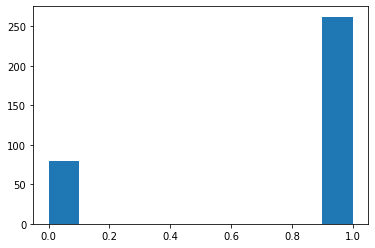

In [15]:
import matplotlib.pyplot as plt
plt.hist(donor_mt.variant_qc.n_het.collect())
plt.show()

In [7]:
# focus on SNVs for now
donor_mt = donor_mt.filter_rows(donor_mt.vep.variant_class == 'SNV')
donor_mt.count()

(290, 1)

In [8]:
# filter for biallelic only
donor_mt = donor_mt.filter_rows(hl.len(donor_mt.alleles) == 2)
donor_mt.count()

(290, 1)

In [9]:
# filter to only variants with some regulatory consequences
donor_mt = donor_mt.filter_rows(hl.len(donor_mt.vep.regulatory_feature_consequences) > 0)
donor_mt.count()

(125, 1)

In [10]:
donor_mt.vep.regulatory_feature_consequences.show()

In [10]:
donor_mt.vep.regulatory_feature_consequences['biotype'].show()

,,
locus,alleles,
locus<GRCh38>,array<str>,array<str>
chr22:23241440,"[""C"",""T""]","[""CTCF_binding_site""]"
chr22:23242243,"[""C"",""G""]","[""promoter""]"
chr22:23242945,"[""A"",""G""]","[""promoter""]"
chr22:23250864,"[""G"",""A""]","[""CTCF_binding_site""]"
chr22:23253570,"[""C"",""T""]","[""TF_binding_site""]"
chr22:23257682,"[""G"",""A""]","[""promoter_flanking_region""]"
chr22:23257826,"[""G"",""A""]","[""promoter_flanking_region""]"
chr22:23261770,"[""T"",""G""]","[""open_chromatin_region""]"


In [11]:
regulatory_consequences = donor_mt.vep.regulatory_feature_consequences['biotype'].collect()
len(regulatory_consequences)

125

In [12]:
regulatory_consequences[0:5]

[['CTCF_binding_site'],
 ['promoter'],
 ['promoter'],
 ['CTCF_binding_site'],
 ['TF_binding_site']]

In [13]:
# get relevant variables
relevant_loci = donor_mt.row_key.collect()
len(relevant_loci)

125

In [14]:
# select full mt down to those variants
mt = mt.filter_rows(hl.set(relevant_loci).contains(mt.row_key))
mt.count()

(125, 1061)

In [15]:
# get maf
mt = hl.variant_qc(mt)
mt.variant_qc.AF[0].show()

,,
locus,alleles,
locus<GRCh38>,array<str>,float64
chr22:23241440,"[""C"",""T""]",2.93e-01
chr22:23242243,"[""C"",""G""]",4.87e-01
chr22:23242945,"[""A"",""G""]",3.36e-01
chr22:23250864,"[""G"",""A""]",3.39e-01
chr22:23253570,"[""C"",""T""]",4.17e-01
chr22:23257682,"[""G"",""A""]",4.04e-01
chr22:23257826,"[""G"",""A""]",4.04e-01
chr22:23261770,"[""T"",""G""]",3.37e-01


In [16]:
maf_sample_list = mt.variant_qc.AF[0].collect()
maf_sample_list[0:5]

[0.29333333333333333,
 0.4868421052631579,
 0.33631713554987214,
 0.3393316195372751,
 0.4166666666666667]

In [17]:
ref_ht = hl.read_table('gs://cpg-reference/seqr/v0-1/combined_reference_data_grch38-2.0.4.ht')
ref_ht.gnomad_genomes.show()

+---------------+------------+-------------------+-------------------+
| locus         | alleles    | gnomad_genomes.AF | gnomad_genomes.AN |
+---------------+------------+-------------------+-------------------+
| locus<GRCh38> | array<str> |           float64 |             int32 |
+---------------+------------+-------------------+-------------------+
| chr1:10001    | ["T","A"]  |                NA |                NA |
| chr1:10001    | ["T","C"]  |                NA |                NA |
| chr1:10001    | ["T","G"]  |                NA |                NA |
| chr1:10002    | ["A","C"]  |                NA |                NA |
| chr1:10002    | ["A","G"]  |                NA |                NA |
| chr1:10002    | ["A","T"]  |                NA |                NA |
| chr1:10003    | ["A","C"]  |                NA |                NA |
| chr1:10003    | ["A","G"]  |                NA |                NA |
| chr1:10003    | ["A","T"]  |                NA |                NA |
| chr1:10004    | ["C","A"]  |                NA |                NA |
+---------------+------------+-------------------+-------------------+

+-------------------+--------------------+------------------------------------+
| gnomad_genomes.AC | gnomad_genomes.Hom | gnomad_genomes.AF_POPMAX_OR_GLOBAL |
+-------------------+--------------------+------------------------------------+
|             int32 |              int32 |                            float64 |
+-------------------+--------------------+------------------------------------+
|                NA |                 NA |                                 NA |
|                NA |                 NA |                                 NA |
|                NA |                 NA |                                 NA |
|                NA |                 NA |                                 NA |
|                NA |                 NA |                                 NA |
|                NA |                 NA |                                 NA |
|                NA |                 NA |                                 NA |
|                NA |                 NA |                                 NA |
|                NA |                 NA |                                 NA |
|                NA |                 NA |                                 NA |
+-------------------+--------------------+------------------------------------+

+-----------------------+---------------------+
| gnomad_genomes.FAF_AF | gnomad_genomes.Hemi |
+-----------------------+---------------------+
|               float64 |               int32 |
+-----------------------+---------------------+
|                    NA |                  NA |
|                    NA |                  NA |
|                    NA |                  NA |
|                    NA |                  NA |
|                    NA |                  NA |
|                    NA |                  NA |
|                    NA |                  NA |
|                    NA |                  NA |
|                    NA |                  NA |
|                    NA |                  NA |
+-----------------------+---------------------+
showing top 10 rows

In [18]:
ref_ht.describe()

----------------------------------------
Global fields:
    'date': str 
    'datasets': dict<str, str> 
    'version': str 
----------------------------------------
Row fields:
    'locus': locus<GRCh38> 
    'alleles': array<str> 
    'cadd': struct {
        PHRED: float32
    } 
    'g1k': struct {
        AC: int32, 
        AF: float64, 
        AN: int32, 
        POPMAX_AF: float64
    } 
    'mpc': struct {
        MPC: str
    } 
    'eigen': struct {
        Eigen_phred: float64
    } 
    'dbnsfp': struct {
        SIFT_pred: str, 
        Polyphen2_HVAR_pred: str, 
        MutationTaster_pred: str, 
        FATHMM_pred: str, 
        MetaSVM_pred: str, 
        REVEL_score: str, 
        GERP_RS: str, 
        phastCons100way_vertebrate: str, 
        VEST4_score: str, 
        fathmm_MKL_coding_pred: str, 
        MutPred_score: str
    } 
    'topmed': struct {
        AC: int32, 
        AF: float64, 
        AN: int32, 
        Hom: int32, 
        Het: int32
    } 
  

In [19]:
donor_mt = donor_mt.annotate_rows(
    cadd=ref_ht[donor_mt.row_key].cadd,
    gnomad_genomes=ref_ht[donor_mt.row_key].gnomad_genomes,
)

In [11]:
donor_mt.gnomad_genomes.show()

In [12]:
maf_popmax = donor_mt.gnomad_genomes.AF_POPMAX_OR_GLOBAL.collect()
maf_popmax[0:5]

AttributeError: MatrixTable instance has no field, method, or property 'gnomad_genomes'
    Hint: use 'describe()' to show the names of all data fields.

In [13]:
cadd_list = donor_mt.cadd.PHRED.collect()

In [25]:
onek1k_id = '943_944'
cpg_id = 'CPG9951'
gene_name = 'IGLL5'

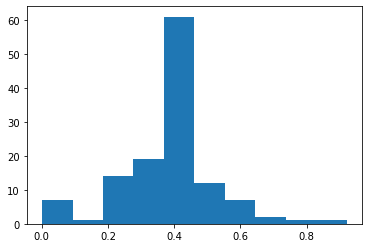

In [83]:
import matplotlib.pyplot as plt
plt.hist(maf_sample_list)
plt.show()

In [80]:
results_data = {
        'onek1k_id': onek1k_id,
        'cpg_id': cpg_id,
        'ensembl_gene_id': ensembl_gene_id,
        'gene_name': gene_name,
        'chrom': chrom,
        'gene_start': int(gene_start),
        'gene_end': int(gene_end),
        'variant_id': donor_mt.row_key[0].collect(),
        # 'cadd': cadd_list,
        'maf_onek1k': maf_sample_list,
        # 'maf_gnomad_popmax': maf_popmax,
        'regulatory_consequences': regulatory_consequences,
    }

In [81]:
import pandas as pd
df = pd.DataFrame(results_data)

In [82]:
df.head()

,onek1k_id,cpg_id,ensembl_gene_id,gene_name,chrom,gene_start,gene_end,variant_id,maf_onek1k,regulatory_consequences
0,943_944,CPG9951,ENSG00000254709.8,IGLL5,22,22887780,22896111,chr22:23241440,0.293333,[CTCF_binding_site]
1,943_944,CPG9951,ENSG00000254709.8,IGLL5,22,22887780,22896111,chr22:23242243,0.486842,[promoter]
2,943_944,CPG9951,ENSG00000254709.8,IGLL5,22,22887780,22896111,chr22:23242945,0.336317,[promoter]
3,943_944,CPG9951,ENSG00000254709.8,IGLL5,22,22887780,22896111,chr22:23250864,0.339332,[CTCF_binding_site]
4,943_944,CPG9951,ENSG00000254709.8,IGLL5,22,22887780,22896111,chr22:23253570,0.416667,[TF_binding_site]


In [45]:
chrom = '22'

In [46]:
gene_file = (
        'gs://cpg-tob-wgs-main/scrna-seq/grch38_association_files/gene_location_files/GRCh38_geneloc_chr'
        + chrom
        + '.tsv'
    )

In [47]:
gene_df = pd.read_csv(gene_file, sep='\t', index_col=0)
gene_df.head()

,gene_name,chr,start,end,strand
gene_id,,,,,
ENSG00000277248.1,U2,chr22,10736171,10736283,-
ENSG00000283047.1,FRG1FP,chr22,10939388,10961338,-
ENSG00000279973.2,SC22CB-56B3.1,chr22,11066418,11068174,+
ENSG00000226444.2,ACTR3BP7,chr22,11124337,11125705,+
ENSG00000276871.1,5_8S_rRNA,chr22,11249809,11249959,-


In [72]:
gene_start = gene_df[gene_df['gene_name'] == gene_name]['start']
int(gene_start)

22887780

In [79]:
gene_end = gene_df[gene_df['gene_name'] == gene_name]['end']
int(gene_end)

22896111

In [65]:
ensembl_gene_id = gene_df[gene_df['gene_name'] == gene_name].index[0]
ensembl_gene_id

'ENSG00000254709.8'

In [76]:
interval_start = int(gene_df[gene_df['gene_name'] == gene_name]['start']) - 10000
interval_end = int(gene_df[gene_df['gene_name'] == gene_name]['end']) + 10000

In [77]:
interval_start

22877780

In [78]:
interval_end

22906111